In [1]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Add path ../..
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [5]:
cust_status = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/hcl-quanht/feature_store/adhoc/analyse-db/DW_ANALYTICS/data/DATA_RPT_SLKH_CUST_PRODUCT_ALL/SAMPLE1_SUB3')
reactive = download_or_reload('data/reactivated', "")

Len 15400281


In [20]:
reactive['REACTIVATED'] = (reactive['CUST_STT'] == 2) & (reactive['CUST_STT_CHG'] == 1)

<Axes: ylabel='REACTIVATED'>

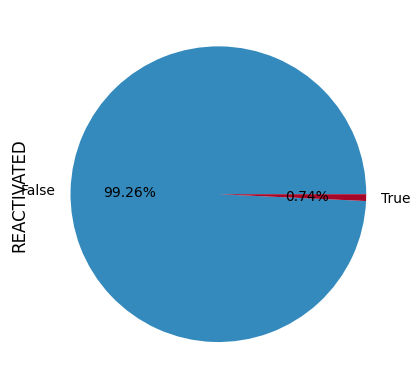

In [23]:
reactive['REACTIVATED'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [21]:
reactive

,CUSTOMER_CDE,RPT_DT,CUST_STT,CUST_STT_LAG,CUST_STT_CHG,REACTIVATED
0,10,2022-12-31,2,2.0,0.0,False
1,100,2022-12-31,2,2.0,0.0,False
2,1000,2022-12-31,2,2.0,0.0,False
3,10000,2022-12-31,0,0.0,0.0,False
4,100000,2022-12-31,2,2.0,0.0,False
...,...,...,...,...,...,...
15400276,9999913,2022-12-31,0,0.0,0.0,False
15400277,9999944,2022-12-31,2,2.0,0.0,False
15400278,9999956,2022-12-31,2,2.0,0.0,False
15400279,999999,2022-12-31,2,2.0,0.0,False


In [9]:
cust_status = cust_status[cust_status['CUST_TYPE']=='CN']

In [16]:
casa = cust_status[cust_status['SD_TKTT']==1]

In [17]:
casa_ngudong = casa[casa['CUST_STATUS'].isin(['NGU DONG', 'DONG BANG'])]

In [27]:
casa_ngudong = casa_ngudong[['CUSTOMER_CDE','CUST_STATUS','LASTEST_TRANS_DT']].merge(reactive[['CUSTOMER_CDE', 'REACTIVATED']], how='inner', left_on='CUSTOMER_CDE', right_on='CUSTOMER_CDE')

In [32]:
casa_ngudong[casa_ngudong['REACTIVATED']==True]

,CUSTOMER_CDE,CUST_STATUS,LASTEST_TRANS_DT,REACTIVATED
22,1234172,NGU DONG,2020-10-27,True
47,12901273,NGU DONG,2021-05-28,True
149,11784426,NGU DONG,2020-04-07,True
175,11775446,NGU DONG,2020-06-11,True
226,13548010,NGU DONG,2021-10-28,True
...,...,...,...,...
79120,9247893,NGU DONG,2020-12-01,True
79124,7608996,NGU DONG,2019-12-05,True
79142,7585744,NGU DONG,2019-01-30,True
79165,3592318,NGU DONG,2021-04-29,True
